In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy.stats import zscore

In [2]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [3]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [4]:
important_cols = ['year', 'ISO_code', 'countries', 'region']
important_cols += [col for col in dataset.columns if 'pf_identity' in col]
important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [5]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


In [12]:
w_dataset = dataset[important_cols]

## 1.1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [13]:

## Remuevo las columnas que sean categoricas nominales.
nonordinals_cols_to_remove = ['ISO_code', 'countries', 'region']
w_dataset_range = w_dataset.drop(columns = nonordinals_cols_to_remove)


In [14]:
## Calculo el rango para cada columna.
pandas.DataFrame([w_dataset_range.min(), w_dataset_range.max(), w_dataset_range.max() - w_dataset_range.min()], 
                     index=['min','max','rango']).transpose()

,min,max,rango
year,2008.000000,2016.000000,8.000000
pf_identity_legal,0.000000,10.000000,10.000000
pf_identity_parental_marriage,0.000000,10.000000,10.000000
pf_identity_parental_divorce,0.000000,10.000000,10.000000
pf_identity_parental,0.000000,10.000000,10.000000
pf_identity_sex_male,0.000000,10.000000,10.000000
pf_identity_sex_female,0.000000,10.000000,10.000000
pf_identity_sex,0.000000,10.000000,10.000000
pf_identity_divorce,0.000000,10.000000,10.000000
pf_identity,0.000000,10.000000,10.000000


### 1.1. Interpretacion.

De la tabla enterior, podemos observar que:

Se obtuvieron las variables para cada pais a lo largo de 8 años, una vez por año, desde el 2010 al 2018. 

Se ha usado una scala de puntajes del 0 al 10 (0 es menos libre y 10 el mas libre) para medir las diferentes variables relacionadas a las libertades personales (variables pf_identity) para luego obtener un puntaje final (hf_score) y por ultimo un ranking (hf_rank) de libertad personal entre los 162 paises. 

Con respecto a las variables de libertad economica se observan dos, el puntaje de libertad economica (ef_score) cuyos valores son puntajes del 0 al 10 y el ranking de libertad economica entre los 162 paises.

Por ultimo, con respecto a los puntajes finales de libertad se observa que el pais con menor libertad personal es 5.36 puntos menos libre que el de mayor libertad personal y el pais con menor libertad economica es 6.31 puntos menos libre que el pais con mayo libertad economica.

## 1.2. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [84]:
w_dataset.loc[w_dataset['region'] == 'Latin America & the Caribbean', 'grupo'] = 'Latin America & the Caribbean'
w_dataset.loc[w_dataset['region'] != 'Latin America & the Caribbean', 'grupo'] = 'Others'
## Remuevo valores NaN
w_dataset_cleaned = w_dataset[['year', 'countries', 'grupo', 'pf_identity', 'hf_score']].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
w_dataset_cleaned.describe()

,year,pf_identity,hf_score
count,1378.000000,1378.000000,1378.000000
mean,2012.111756,7.334180,6.993444
std,2.569130,3.159473,1.025811
min,2008.000000,0.000000,3.765827
25%,2010.000000,5.000000,6.336685
50%,2012.000000,9.166667,6.923840
75%,2014.000000,10.000000,7.894660
max,2016.000000,10.000000,9.126313


In [86]:
## Filtro LAtam
latam_cleaned = w_dataset_cleaned[w_dataset_cleaned['grupo'] == 'Latin America & the Caribbean']
## Una pequeña descripcion para saber con que valores estoy tratando
latam_cleaned.describe()

,year,pf_identity,hf_score
count,232.000000,232.000000,232.000000
mean,2012.030172,8.765086,7.047982
std,2.577617,1.711732,0.608904
min,2008.000000,5.000000,4.200724
25%,2010.000000,7.500000,6.779311
50%,2012.000000,10.000000,7.028045
75%,2014.000000,10.000000,7.339903
max,2016.000000,10.000000,8.290152


In [87]:
## Filtro Resto del Mundo
others_cleaned = w_dataset_cleaned[w_dataset_cleaned['grupo'] == 'Others']
## Una pequeña descripcion para saber con que valores estoy tratando
others_cleaned.describe()



,year,pf_identity,hf_score
count,1146.000000,1146.000000,1146.000000
mean,2012.128272,7.044503,6.982403
std,2.568221,3.303771,1.090861
min,2008.000000,0.000000,3.765827
25%,2010.000000,5.000000,6.204917
50%,2012.000000,8.333333,6.867191
75%,2014.000000,10.000000,8.023044
max,2016.000000,10.000000,9.126313


In [88]:
## Medidas descriptivas de LA y Caribe.
pandas.DataFrame([latam_cleaned.mean(), latam_cleaned.median(), latam_cleaned.std()], 
                 index=['media','mediana','desviacion'])[["pf_identity", "hf_score"]]

,pf_identity,hf_score
media,8.765086,7.047982
mediana,10.000000,7.028045
desviacion,1.711732,0.608904


In [89]:
## Medidas descriptivas del resto del mundo.
pandas.DataFrame([others_cleaned.mean(), others_cleaned.median(), others_cleaned.std()], 
                 index=['media','mediana','desviacion'])[["pf_identity", "hf_score"]]

,pf_identity,hf_score
media,7.044503,6.982403
mediana,8.333333,6.867191
desviacion,3.303771,1.090861


In [90]:
## Medias distintas, usamos el coeficiente de variacion para comparar cual de los grupos tiene mayor dispersion.
from scipy.stats import variation 
coefvar_latam = variation(latam_cleaned[["pf_identity", "hf_score"]])
coefvar_ohters = variation(others_cleaned[["pf_identity", "hf_score"]])
pandas.DataFrame({'pf_identity': [coefvar_latam[0], coefvar_ohters[0]], 
                  'hf_score': [coefvar_latam[1], coefvar_ohters[1]]},
                index=['Latam y Caribe','Resto del Mundo'])


,pf_identity,hf_score
Latam y Caribe,0.194868,0.086208
Resto del Mundo,0.468781,0.156162


### 1.2 Interpretacion

#### pf_indentity (ver que mide pf_identity en kaggle)

Si observamos la media para ambos grupos vemos que difieren. Sin embargo los coeficientes de variacion indican que las observaciones en el grupo Resto del Mundo presentan mayor dispersion con respecto a la media que el grupo de LA y Caribe.

Si observamos la mediana en Latam y Caribe el valor central observado es de 10 y en el Resto del Mundo es de 8.33. Podemos decir que, segun la mediana, en el grupo Latam y Caribe se tiene menor libertad.

#### hf_score (ver que mide hf_score en kaggle)

Si observamos la media para ambos grupos vemos que difieren, segun la media el grupo Resto del Mundo. Los coeficientes de variacion indican que las observaciones en el grupo Resto del Mundo presentan mayor dispersion.

Si observamos la mediana en Latam y Caribe el valor central observado es de 7.02 y en el Resto del Mundo es de 6.87. Podemos decir que, segun la mediana, en el grupo Latam y Caribe se tiene menor puntaje en libertades humanas.

## 1.3 ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?


## 1.4 ¿Cómo pueden sanearse los valores faltantes?

Lo datos faltantes pueden sanearse asignandoles el valor de la medida descriptiva mas conveniente para cada variable o un valor constante si tiene algun significado segun el estudio a realizar.

## 1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

In [102]:
## Outliers por grupo usando x veces la distancia a la media.

w_dataset_cleaned['pf_identity_zscore'] = zscore(w_dataset_cleaned["pf_identity"])
w_dataset_cleaned['hf_score_zscore'] = zscore(w_dataset_cleaned["hf_score"])

pf_identity_zscore_outliers = w_dataset_cleaned["pf_identity_zscore"].apply(
    ## Si zscore es menor 2.5 o mayor a 2.5, el valor observado esta en el 5% mas chico o mas grande.
  lambda x: x <= -2.5 or x >= 2.5
)
hf_score_zscore_outliers = w_dataset_cleaned["hf_score_zscore"].apply(
    ## Si zscore es menor 2.5 o mayor a 2.5, el valor observado esta en el 5% mas chico o mas grande.
  lambda x: x <= -2.5 or x >= 2.5
)


In [106]:
w_dataset_cleaned[pf_identity_zscore_outliers][["year","countries","grupo","pf_identity"]]

,year,countries,grupo,pf_identity


In [107]:
w_dataset_cleaned[hf_score_zscore_outliers][["year","countries","grupo","hf_score"]]

,year,countries,grupo,hf_score
69,2016,Iraq,Others,4.258014
86,2016,Libya,Others,4.310283
141,2016,Syria,Others,3.765827
157,2016,Venezuela,Latin America & the Caribbean,4.200724
159,2016,"Yemen, Rep.",Others,4.253278
303,2015,Syria,Others,3.910826
319,2015,Venezuela,Latin America & the Caribbean,4.241750
321,2015,"Yemen, Rep.",Others,4.203442
465,2014,Syria,Others,4.023595
627,2013,Syria,Others,4.095028


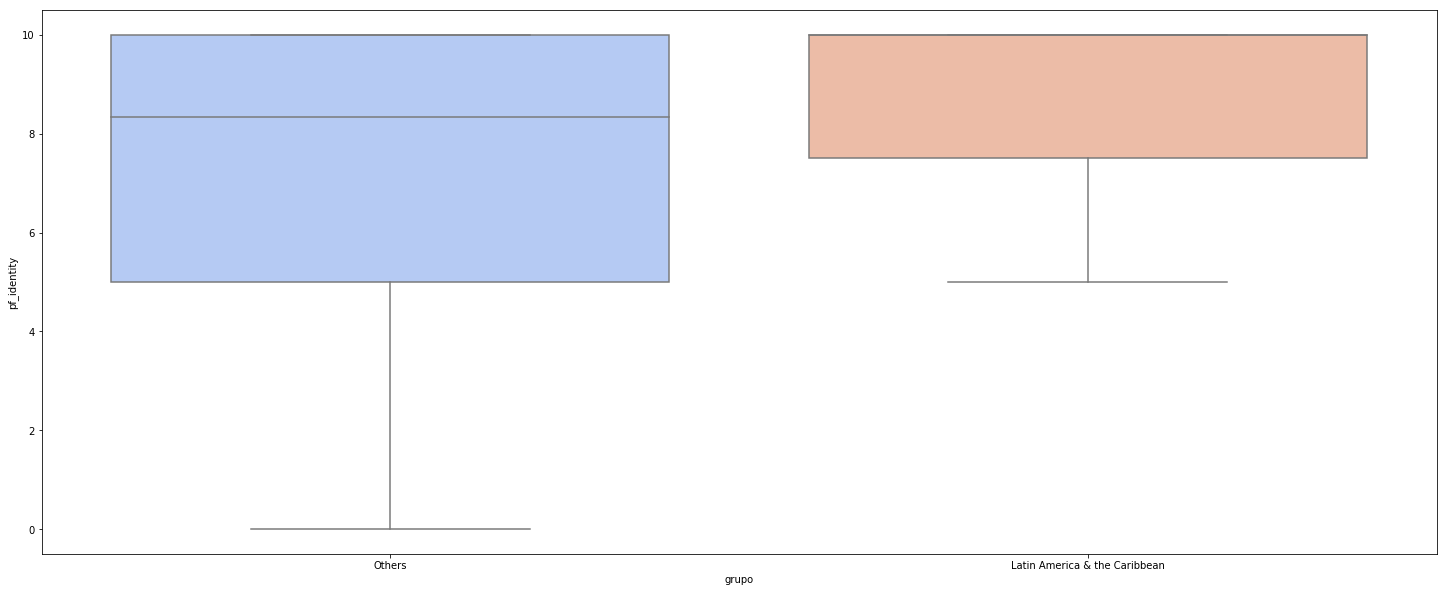

In [108]:
## Outliers por grupo segun box plot.

## Box plot para pf_identity
plt.figure(figsize=(25,10))
seaborn.boxplot(x="grupo", y="pf_identity", data=w_dataset_cleaned, palette="coolwarm")

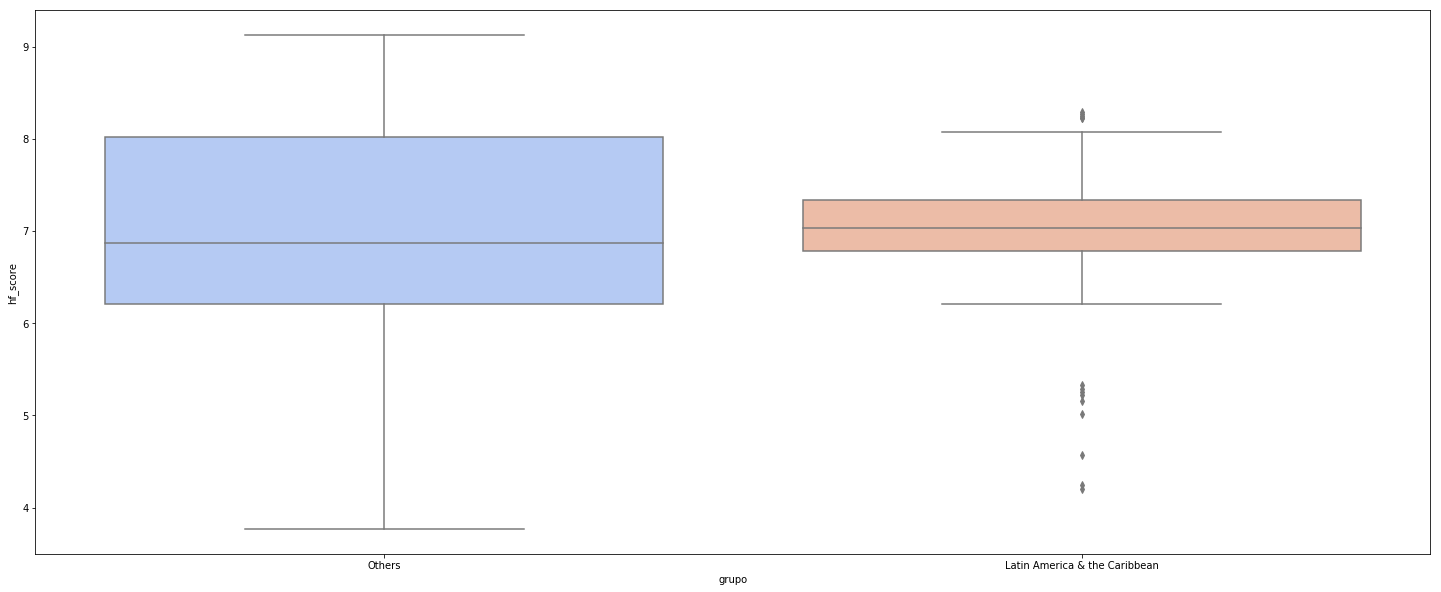

In [109]:
## Box plot para hf_score
plt.figure(figsize=(25,10))
seaborn.boxplot(x="grupo", y="hf_score", data=w_dataset, palette="coolwarm")

In [ ]:
## TODO: calcular el IRQ para saber que filas son las outliers. (Q1 - (1.5 * IQR )) y (Q2 + (1.5 * IQR ))

## 1.5 Interpretacion

### Outliers de grupo LA y Caribe y Resto del Mundo segun zscore
No se observan outliers para pf_identity en el grupo Latam y Caribe.
No se observan outliers para pf_identity en el grupo Resto del Mundo.

Se observan 2 outliers para hf_score en el grupo Latam y Caribe.
Se observa 8 outlier para hf_score en el grupo Resto del Mundo.

### Outliers de grupo LA y Caribe y Resto del Mundo segun boxplot
No se observan outliers para pf_identity.

Se observan outliers para hf_score para el grupo Latam y Caribe.
No se observan outliers para hf_score para el grupo Resto del Mundo.

### Los eliminamos o no?
Los eliminariamos para aproximarnos a una distribucion normal. En las conclusiones los nombrariamos como casos especiales.